# $k$ Nearest Neighbors regression

## What we will accomplish

In this notebook we will:
- Explain the difference between parametric and non-parametric methods.
- Introduce the $k$ Nearest Neighbors regression algorithm 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

## Parametric vs. Non-Parametric

The terms "parametric" and "non-parametric" do not have standardized definitions.

We have already explained the parametric regression framework:  a model or "hypothesis class" is a family of functions $f_\beta$ parameterized by $\beta$.  Generally $\beta$ is a vector of a fixed length.  We fit a model by finding the value of $\beta$ which minimize a loss function which compares model outputs $f(x_i)$ to actual observed outputs $y_i$.

By contrast a **non-parametric** model has a hypothesis class of functions which are not easily parameterized by a vector of a fixed length.  

Our first example of a non-parametric model is $k$ Nearest Neighbors regression (kNN for short).

## kNN Regression

Given data of the form $(\vec{x}_i, y_i)$ with $\vec{x}_i \in \mathbb{R}^p$ and $y_i \in \mathbb{R}$:

* We select a whole number $k$.  
    * This is our first example of a **hyperparameter**:  our choice of $k$ defines the hypothesis class rather than being a parameter which we alter when fitting the model.
* Given any $\vec{x} \in \mathbb{R}^p$ we define $f(\vec{x})$ to be the mean of $y_i$ for the $k$ training inputs $\vec{x}_i$ which are nearest to $x$.

That is it!

Some notes about the model:
* If the input $x$ is "far" from the original training data kNN will generalize poorly.
* Although Euclidean distance is the most common choice, other metrics can be used.
* You don't have to use the mean:  you could use a weighted mean, the median, etc.
* It is common to first scale your data so that the features on the largest scale do not dominate.  This can sometimes destroy "signal" so be sure to check that this choice improves cross-validation performance.
* It is computationally intensive to actually find the nearest $k$ training points, so in practice the neighbors found are approximately correct but may not be the true $k$ nearest neighbors. 

### In `sklearn`

$k$ nearest neighbors regression can be performed with `sklearn`'s `KNeighborsRegressor` model object, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html">https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html</a>. 

In [2]:
## import KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

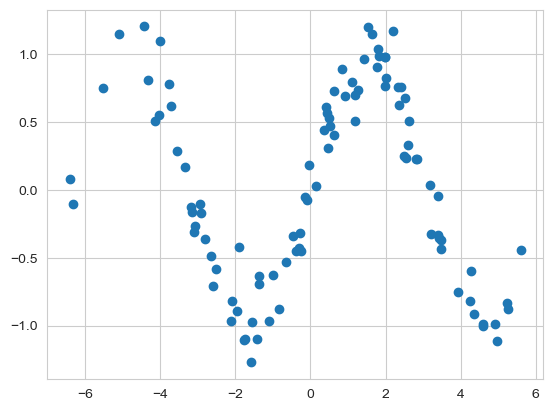

In [3]:
np.random.seed(216)
X = 3*np.random.normal(size = (100,1))
y = (np.sin(X) + 0.2*np.random.normal(size = X.shape)).reshape(-1)

plt.scatter(X,y)
plt.show()

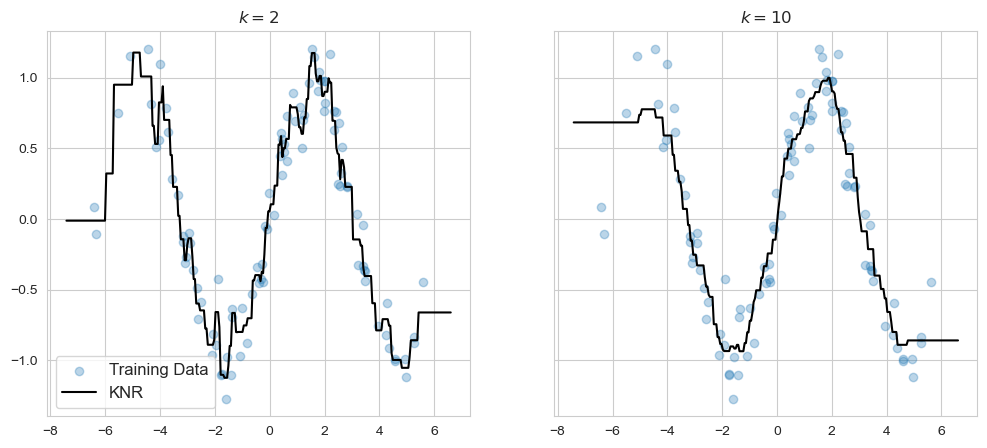

In [4]:
## make model objects
knr_2 = KNeighborsRegressor(2)
knr_10 = KNeighborsRegressor(10)

## Fit the models
knr_2.fit(X,y)
knr_10.fit(X,y)

## Plot the fits
fig,ax = plt.subplots(1, 2, figsize = (12,5), sharex=True, sharey=True)

ax[0].scatter(X, 
              y,
              alpha = .3,
              label="Training Data")
ax[1].scatter(X, 
              y,
              alpha = .3,
              label="Training Data")

ax[0].plot(np.linspace(np.min(X)-1,np.max(X)+1, 300).reshape(-1,1),
           knr_2.predict(np.linspace(np.min(X)-1,np.max(X)+1, 300).reshape(-1,1)),
           'k',
           label="KNR")

ax[0].set_title('$k = 2$')

ax[1].plot(np.linspace(np.min(X)-1,np.max(X)+1, 300).reshape(-1,1),
           knr_10.predict(np.linspace(np.min(X)-1,np.max(X)+1, 300).reshape(-1,1)),
           'k',
           label="KNR")

ax[1].set_title('$k = 10$')

ax[0].legend(fontsize=12)

plt.show()

Notice that kNN gives piecewise constant predictions.  These become constant once you get outside of the interval where we had training data!

--------------------------

This notebook was written for the Erdős Institute Data Science Boot Camp by Steven Gubkin.

Please refer to the license in this repo for information on redistribution.